In [1]:
!pip install opendatasets
import numpy as np
import pandas as pd
import opendatasets as od

In [2]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/techsash/waste-classification-data'
# Using opendatasets let's download the data sets
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nedaaabuhussein
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data


100%|██████████| 427M/427M [00:21<00:00, 20.8MB/s]


In [3]:
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob

from tqdm import tqdm

from skimage.io import imread, imshow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

In [4]:
train_path = "/content/waste-classification-data/DATASET/TRAIN"
test_path = "/content/waste-classification-data/DATASET/TEST"

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob
import cv2

In [6]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:09<00:00, 1284.52it/s]


In [ ]:
data.shape

(22564, 2)

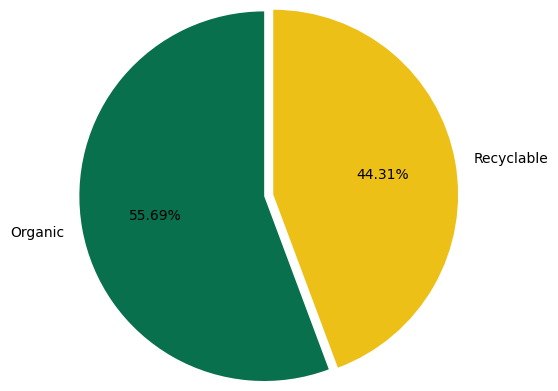

In [ ]:
plt.figure(figsize=(3, 3))
colors = ['#09704D','#ECC017']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

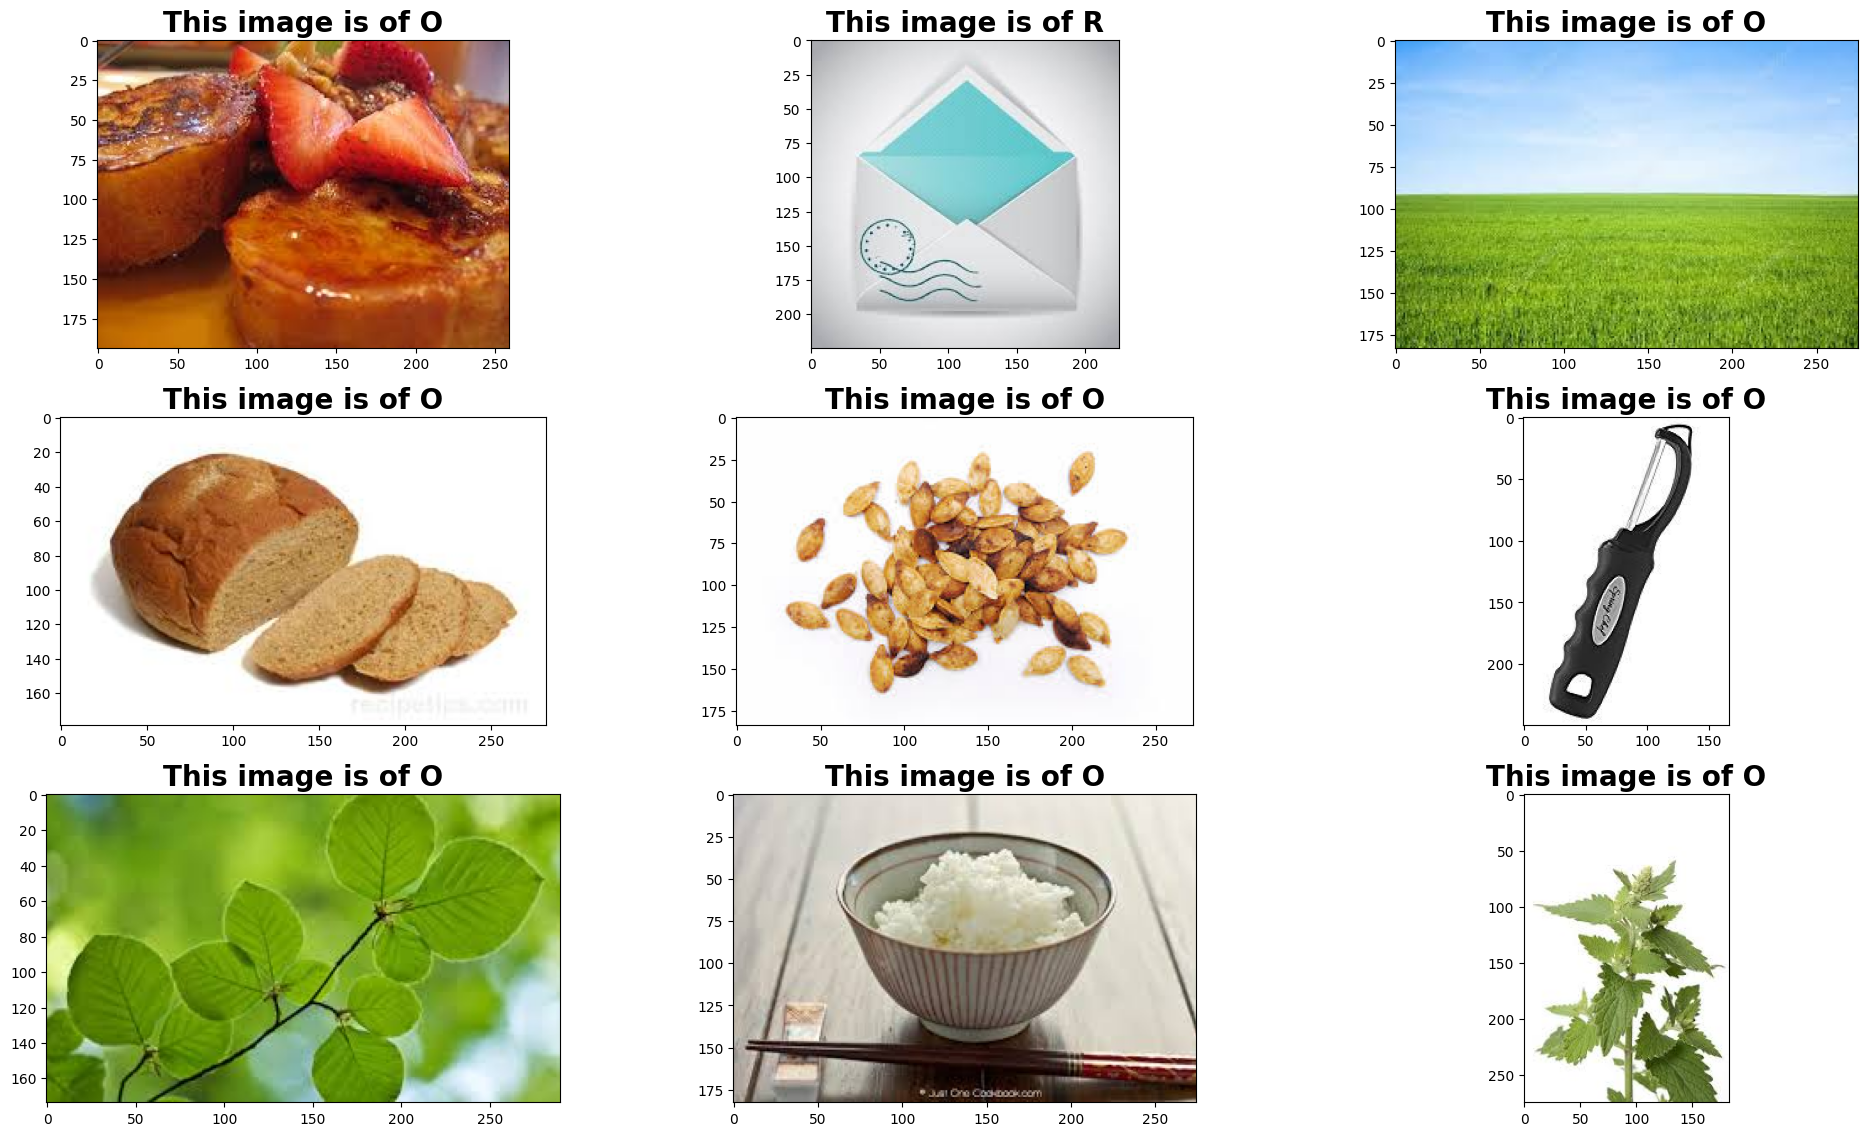

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(114, 114, 3)))
model.add(Activation("relu"))
#model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
#model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
#model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
#model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
#model.add(Dropout(0.5))
model.add(Dense(2)) # output
model.add(Activation("sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])


batch_size = 256

In [8]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [9]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(114, 114),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(114, 114),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [15]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
565/565 [==============================] - 80s 135ms/step - loss: 0.5112 - accuracy: 0.8019 - val_loss: 0.4243 - val_accuracy: 0.7963
Epoch 2/5
565/565 [==============================] - 76s 134ms/step - loss: 0.3565 - accuracy: 0.8477 - val_loss: 0.4016 - val_accuracy: 0.8136
Epoch 3/5
565/565 [==============================] - 75s 133ms/step - loss: 0.2765 - accuracy: 0.8852 - val_loss: 0.4694 - val_accuracy: 0.7961
Epoch 4/5
565/565 [==============================] - 75s 133ms/step - loss: 0.1613 - accuracy: 0.9392 - val_loss: 0.6277 - val_accuracy: 0.8050
Epoch 5/5
565/565 [==============================] - 75s 133ms/step - loss: 0.0857 - accuracy: 0.9742 - val_loss: 0.7348 - val_accuracy: 0.7930


In [ ]:
model.save('CNN_model_path.h5')
# from tensorflow.keras.models import load_model
# CNN_model = load_model('CNN_model_path.h5')
# predictions = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
results = model.evaluate(validation_generator)
print(f"Accuracy: {results[1]*100:.2f}%")
print(f"Precision: {results[2]*100:.2f}%")
print(f"Recall: {results[3]*100:.2f}%")
f1_score = 2 * (results[2] * results[3]) / (results[2] + results[3])
print(f"F1-Score: {f1_score:.2f}")

141/141 [==============================] - 5s 26ms/step - loss: 0.6978 - accuracy: 0.4441 - precision: 0.4492 - recall: 0.6230
Accuracy: 44.41%
Precision: 44.92%
Recall: 62.30%
F1-Score: 0.52


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

141/141 [==============================] - 4s 25ms/step
              precision    recall  f1-score   support

           O       0.20      0.00      0.00      2513
           R       0.44      1.00      0.61      1999

    accuracy                           0.44      4512
   macro avg       0.32      0.50      0.31      4512
weighted avg       0.31      0.44      0.27      4512



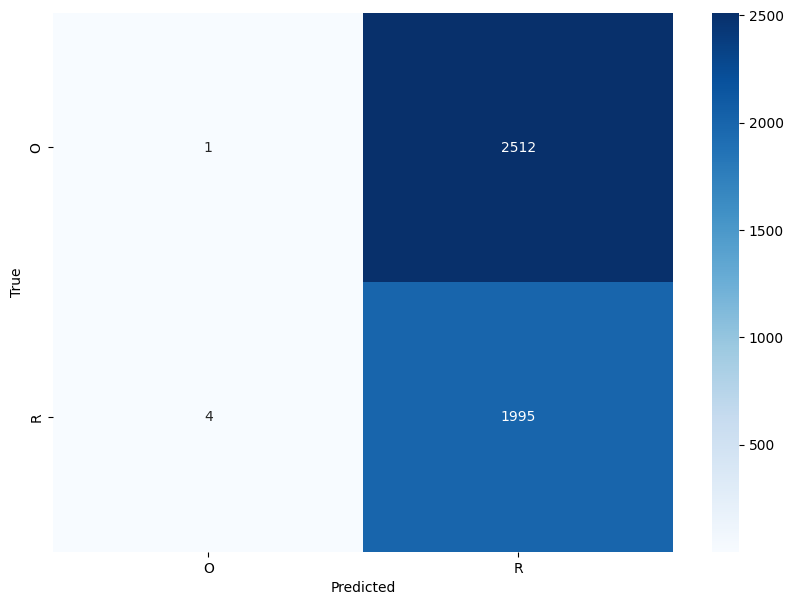

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

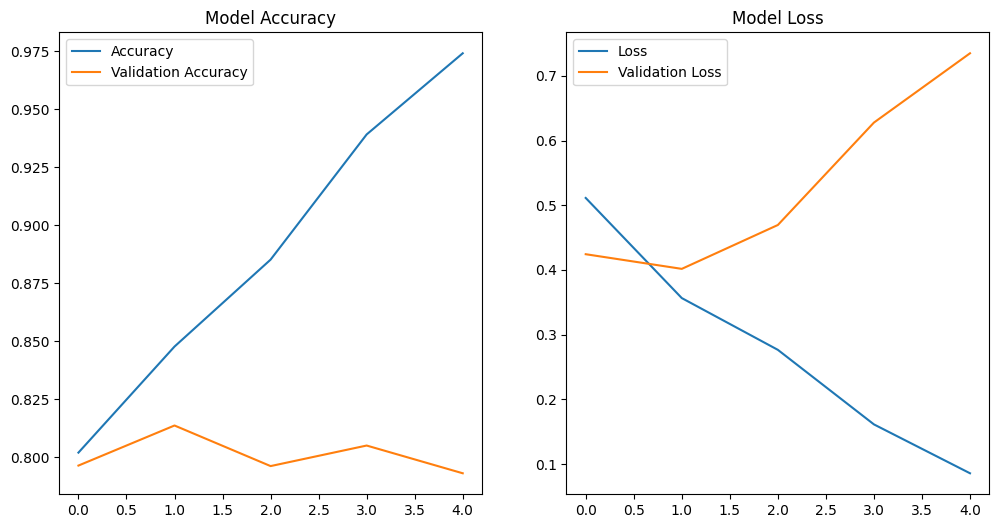

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (114, 114))
    img = np.reshape(img, [-1, 114, 114,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 161ms/step
This image -> Organic


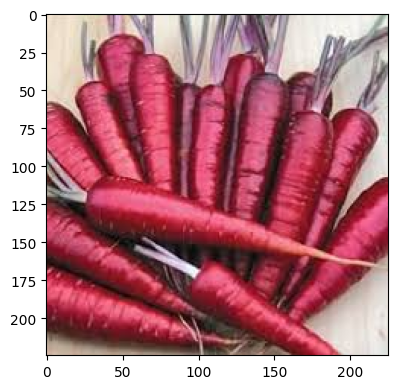

In [ ]:
test_img = cv2.imread("/content/waste-classification-data/DATASET/TEST/O/O_12650.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 57ms/step
This image -> Organic


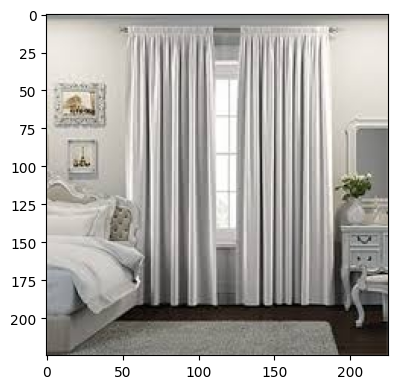

In [ ]:
test_img = cv2.imread("/content/waste-classification-data/DATASET/TEST/R/R_10280.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 44ms/step
This image -> Organic


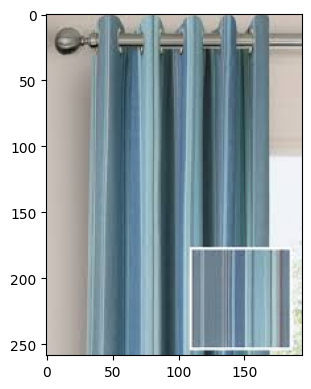

In [ ]:

test_img = cv2.imread("/content/waste-classification-data/dataset/DATASET/TEST/R/R_10057.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 81ms/step
This image -> Organic


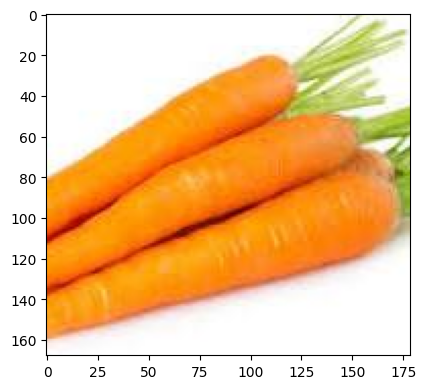

In [ ]:
test_img = cv2.imread("/content/o.jpg")
predict_func(test_img)